<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;">Simple Linear Regression</span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


I am working on a project using simple linear regression to predict a response based on a single feature. It's one of the first machine learning models that enthusiasts learn about. In linear regression, we assume that the dependent variable (y) and the independent variable (x) have a linear relationship. Therefore, I aim to find a linear function that can accurately predict the response value (y) based on the feature or independent variable (x).

When performing simple linear regression, I am keeping in mind these key points:
- **Linear Relationship:** Ensuring x and y have a linear relationship.
- **Data Quality:** Checking for missing values and outliers.
- **Assumptions:** Verifying linearity, independence, homoscedasticity, and normality of residuals.
- **Coefficients Interpretation:** Understanding the meaning of the intercept and slope.
- **Goodness of Fit:** Using metrics like R-squared to evaluate the model.
- **Residual Analysis:** Checking residual plots for patterns.
- **Avoid Overfitting:** Ensuring the model generalizes well.
- **Data Transformation:** Transforming variables if needed for linearity.
- **Domain Knowledge:** Using domain knowledge to make sense of the model.

**About the data:**
In this specific dataset, there are only 2 columns: the first one is Age, and the second one is Premium. I am using this dataset to practice simple linear regression and make predictions. By applying simple linear regression, I aim to predict the Premium amount based on Age.

<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;">Importing Libraries</span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;">Loading the Dataset </span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


In [2]:
df=pd.read_csv("simplelinearregression.csv")

<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;">Data Exploration</span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


In [3]:
df.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [4]:
df.shape

(7, 2)

In [5]:
df.isnull().sum()

Age        0
Premium    0
dtype: int64

- **Age**: There are 0 missing values in the Age column.
- **Premium**: There are 0 missing values in the Premium column.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7.0,25.857143,5.273474,18.0,22.5,26.0,29.5,33.0
Premium,7.0,20214.285714,6283.955382,10000.0,16500.0,21000.0,25250.0,27000.0


- **Age**: The ages in the dataset range from 18 to 33 years, with an average age of about 25.86 years. The distribution is relatively narrow, with most individuals falling between 22.5 and 29.5 years.

- **Premium**: The premiums range from 10,000 to 27,000, with an average premium of about 20,214.29. The premiums show a wider spread, indicating a higher variability in the amounts paid.

<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;">Exploratory Data Analysis</span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


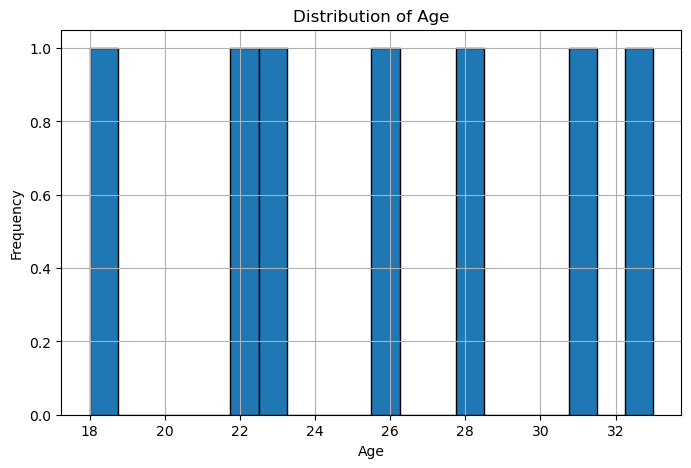

In [7]:
# Analyze Age Distribution

plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=20, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()

- **Uniform Distribution**: The ages in the dataset are uniformly distributed, with each age occurring exactly once. This means there is an equal representation of each age value within the dataset.
- **Range of Ages**: The ages range from 18 to 33 years, as indicated by the bars on the x-axis.
- **No Repetition**: Since each bar has a height of 1, there are no repeated ages in the dataset. Each age appears only once.
This uniform distribution indicates that the dataset has a small and diverse range of ages, without any age being overrepresented.

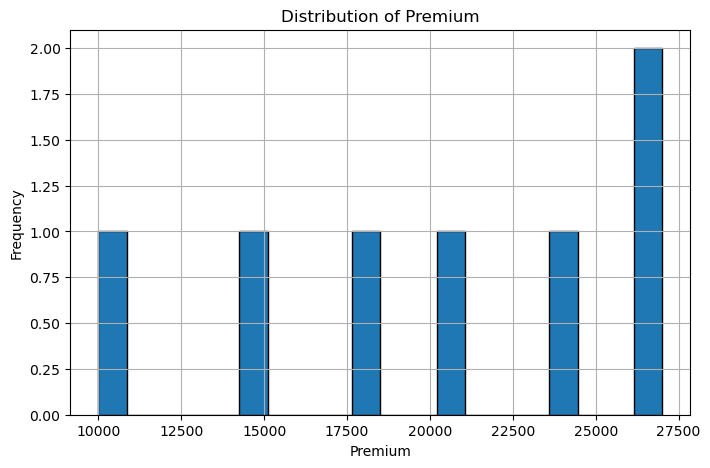

In [8]:
# Analyze Premium Distribution

plt.figure(figsize=(8, 5))
plt.hist(df["Premium"], bins=20, edgecolor="black")
plt.xlabel("Premium")
plt.ylabel("Frequency")
plt.title("Distribution of Premium")
plt.grid(True)
plt.show()

- **Frequency of Premiums**: Most premium values (10000, 15000, 17500, 20000, 22500, 25000) occur exactly once, as indicated by the bars having a height of 1.
- **Higher Frequency**: The premium value of 27000 appears twice, as indicated by the bar having a height of 2.
- **Range of Premiums**: The premiums in the dataset range from 10000 to 27000.
- **Distribution Pattern**: There is a relatively even distribution of premiums across the given range, with a slight peak at 27000.

This distribution indicates that while most premium amounts are unique, the premium of 27000 is more common, appearing twice in the dataset.

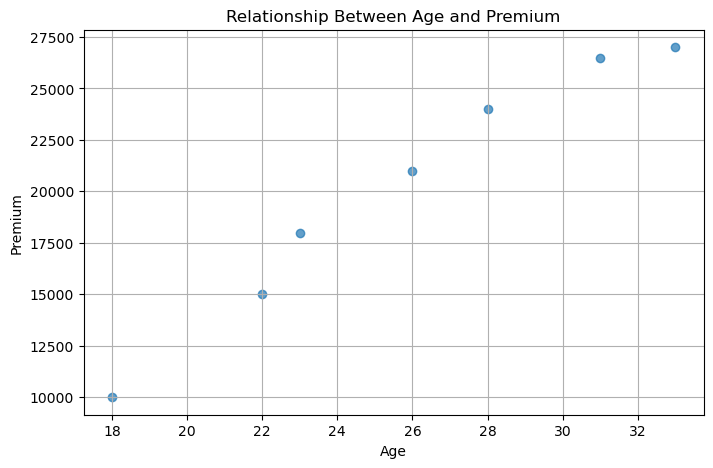

In [9]:
# Relationship between Age and Premium

plt.figure(figsize=(8, 5))
plt.scatter(df["Age"], df["Premium"], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Premium")
plt.title("Relationship Between Age and Premium")
plt.grid(True)
plt.show()

- **Positive Relationship**: There appears to be a positive relationship between age and premium. As age increases, the premium tends to increase as well.
- **Trend**: The data points suggest a linear trend, indicating that older individuals tend to have higher premiums.
- **Outliers**: There are no significant outliers, as all points follow the general increasing trend.
- **Range**: The ages range from 18 to 33, and the premiums range from 10000 to 27000.

This scatter plot indicates a clear linear relationship between age and premium, where premiums tend to increase with age. This could imply that premium amounts are influenced by the age of the individuals.

In [10]:
# Calculate correlation coefficient (optional)

correlation = df["Age"].corr(df["Premium"])
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.9843315554722871


The correlation coefficient is a statistical measure that indicates the strength and direction of the linear relationship between two variables. In this case, it measures the relationship between age and premium.

The value of the correlation coefficient can range from -1 to 1.

- A positive correlation coefficient indicates that as one variable increases, the other variable also tends to increase. 
(0 < r <= 1)

- A negative correlation coefficient indicates that as one variable increases, the other variable tends to decrease. 
(-1 <= r < 0)

A correlation coefficient of 0 indicates no linear relationship between the two variables.
In your example, the correlation coefficient is 0.9843, which is very close to 1. This indicates a strong positive linear relationship between age and premium. In other words, as age increases, premium also tends to increase.

It's important to note that correlation does not imply causation. 
Just because two variables are correlated does not mean that one variable causes the other. 
There could be a third factor that is causing both variables to change.

<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;">Pre-processing</span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


In [11]:
X=df.drop('Premium',axis=1)
y=df['Age']


<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;">Splitting Data into Training and Testing Sets</span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;"> Linear Regression Model</span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
LR=LinearRegression()

In [16]:
LR.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=LR.predict(X_test)

<p style="font-family: 'Georgia', serif; font-size: 3rem; color: #2e8b57; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #e0ffff; padding: 20px; border-radius: 20px; border: 7px solid #4682b4; width: 95%;">
    <span style="font-weight: bold; color: #2e8b57; animation: pulse 2s infinite;">Evaluating Model Performance</span>
    <span style="font-style: italic; color: #4682b4; animation: pulse 2s infinite;"></span>
    <span style="font-weight: bold; color: #4682b4;"></span>
</p>


In [22]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Mean Squared Error (MSE) 

1. **Definition**:
   - Measures the average of the squared differences between estimated values and true values.

2. **Purpose**:
   - Serves as a risk function representing the expected value of the squared error loss.

3. **Non-Negativity**:
   - Always non-negative; values closer to zero indicate better accuracy.

4. **Components**:
   - **Second Moment of the Error**:
     - The MSE is the second moment of the error about the origin.
   - **Variance and Bias**:
     - Incorporates both the variance of the estimator and its bias.

5. **Range**:
   - The range of MSE is from 0 to ∞, where 0 indicates a perfect model with no error.

In [19]:
M=mean_squared_error(y_test,y_pred)
M

8.414516322357459e-30

### Mean Absolute Error (MAE) 

1. **Definition**:
   - Calculates the average difference between the predicted values and the actual values.

2. **Alternative Name**:
   - Also known as scale-dependent accuracy, as it measures error on the same scale as the observations.

3. **Usage in Machine Learning**:
   - Serves as an evaluation metric for regression models.

4. **Function**:
   - Measures errors between actual values and values predicted by the model.

5. **Range**:
   - The range of MAE is from 0 to ∞, where 0 indicates a perfect model with no error.

6. **Purpose**:
   - Used to assess the accuracy of a machine learning model.

In [20]:
Absolute=mean_absolute_error(y_test,y_pred)
Absolute

2.3684757858670005e-15

##  Root Mean Squared Error (RMSE):
1 **Definition**:
   - The square root of the average of the squared differences between predicted values and actual values.
   
2  **Range**: 
  - From 0 to ∞, with 0 indicating no error.
    
3  **Interpretation**: 
   - Lower values indicate better model performance.



In [23]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms


2.9007785717557725e-15

### R² Score 

1. **Definition**:
   - The R² score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

2. **Purpose**:
   - Indicates the goodness of fit of a regression model, showing how well the independent variables explain the variability of the dependent variable.

3. **Interpretation**:
   - Ranges from 0 to 1:
     - **R² = 1**: Perfect fit, the model explains all the variability of the response data around its mean.
     - **R² = 0**: The model does not explain any of the variability of the response data around its mean.
     - **Negative R²**: Indicates that the model performs worse than a horizontal line (mean of the data).

4. **Components**:
   - **Total Sum of Squares (TSS)**:
     - Measures the total variance in the dependent variable.
   - **Residual Sum of Squares (RSS)**:
     - Measures the variance in the dependent variable that is not explained by the model.

5. **Calculation**:
   - Formula: 
R 
2
 =1− 
(TSS/
RSS)

     Where:
     - \( RSS \) is the sum of the squares of residuals.
     - \( TSS \) is the total sum of squares.
   
   




In [21]:
R2_score=r2_score(y_test,y_pred)
R2_score

1.0

## Simple Linear Regression: A Comprehensive Overview

1. **Definition**:
   - Simple linear regression is a statistical method used to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered the independent variable (predictor), and the other is the dependent variable (response).

2. **Equation**:
   - The equation of a simple linear regression line is \( y = b_0 + b_1x \), where:
     - \( y \) is the dependent variable.
     - \( x \) is the independent variable.
     - \( b_0 \) is the y-intercept.
     - \( b_1 \) is the slope of the line.

3. **Assumptions**:
   - **Linearity**: The relationship between the dependent and independent variables is linear.
   - **Independence**: The observations are independent of each other.
   - **Homoscedasticity**: The residuals (errors) have constant variance at every level of \( x \).
   - **Normality**: The residuals of the model are normally distributed.

4. **Purpose**:
   - To predict the value of the dependent variable based on the value of the independent variable.
   - To determine the strength and direction of the relationship between the variables.

5. **Interpretation of Coefficients**:
   - **Intercept (\( b_0 \))**: The expected value of \( y \) when \( x \) is zero.
   - **Slope (\( b_1 \))**: The change in \( y \) for a one-unit change in \( x \). A positive slope indicates a positive relationship, while a negative slope indicates a negative relationship.

6. **Evaluation**:
   - The performance of a simple linear regression model is typically evaluated using metrics such as the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² Score.
   - Residual plots are used to check for patterns that might suggest violations of model assumptions.

7. **Applications**:
   - Simple linear regression is widely used in various fields such as economics, biology, engineering, and social sciences to make predictions, understand relationships, and identify trends.

8. **Advantages**:
   - Easy to implement and interpret.
   - Provides a clear mathematical relationship between two variables.

9. **Limitations**:
   - Only models linear relationships; cannot capture more complex, non-linear relationships.
   - Sensitive to outliers, which can disproportionately affect the regression line.
   - Assumes that the relationship between variables is stable and does not change over time.

Simple linear regression is a foundational tool in statistical analysis and machine learning, providing valuable insights and predictions from data with a straightforward and interpretable approach.